In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

Start finding chessboard corners of depth image...
find the chessboard corners of depth_calibration_data\01.png
find the chessboard corners of depth_calibration_data\02.png
find the chessboard corners of depth_calibration_data\03.png
find the chessboard corners of depth_calibration_data\04.png
find the chessboard corners of depth_calibration_data\05.png
find the chessboard corners of depth_calibration_data\06.png
find the chessboard corners of depth_calibration_data\07.png
find the chessboard corners of depth_calibration_data\08.png
find the chessboard corners of depth_calibration_data\09.png
find the chessboard corners of depth_calibration_data\10.png


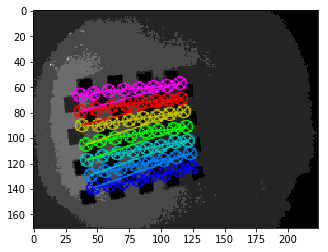

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


img_size = (10, 10)

# Make a list of calibration images
images = glob.glob('depth_calibration_data/*.png')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of depth image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)

In [6]:
print('Depth Camera calibration by recorded IR image...')
img_size = (img.shape[1], img.shape[0])
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(objpoints), len(imgpoints))
print(img_size)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
Vr = np.array(rvecs)
Tr = np.array(tvecs)
extrinsics = np.concatenate((Vr, Tr), axis=1).reshape(-1,6)
print(mtx)
print(dist)
print()
print(extrinsics)
print(Tr) # chessboard寬度 2.5

Depth Camera calibration by recorded IR image...
10 10
(224, 171)
[[211.78734743   0.         117.65755014]
 [  0.         211.60443122  87.02191618]
 [  0.           0.           1.        ]]
[[-1.79341292e-02 -1.88867100e+00 -2.02313569e-04 -4.28223089e-03
   3.24046539e+00]]

[[-7.15205548e-01 -1.93068519e-01  2.86106561e+00  6.09982372e+00
   3.54289184e+00  4.23388316e+01]
 [-4.11003534e-01 -3.33837475e-01  2.92526845e+00  7.88758070e+00
   1.97166738e+00  4.77759772e+01]
 [-3.20479569e-01 -3.86471530e-01  2.91195133e+00  3.19217305e+00
   3.31548537e+00  4.11776653e+01]
 [-4.94022686e-01 -5.99444952e-01  2.73541429e+00  6.49840854e+00
   1.55354280e+00  4.25872801e+01]
 [-3.29583929e-01 -1.00685101e-01  3.02485197e+00  6.70433723e+00
   7.14999953e+00  3.87633190e+01]
 [-5.58587109e-01 -1.28289461e-01  3.06765407e+00  8.91848090e+00
   3.70609492e+00  4.20401062e+01]
 [-4.83463054e-01  1.42323609e-01  3.01275952e+00  5.15247557e+00
   7.35814809e+00  4.98383783e+01]
 [ 6.12643367